In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# Load the dataset
data = pd.read_csv(r'/content/Advertising.csv')

In [3]:
# Exploratory Data Analysis (EDA)
print("First 5 rows of the dataset:")
print(data.head())
print("\nDataset Info:")
data.info()
print("\nSummary statistics:")
print(data.describe())

First 5 rows of the dataset:
   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB

Summary statistics:
       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   

In [5]:
# Checking for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())


Missing values in each column:
Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


In [6]:
# Data Cleaning: Dropping rows with missing values
data = data.dropna()

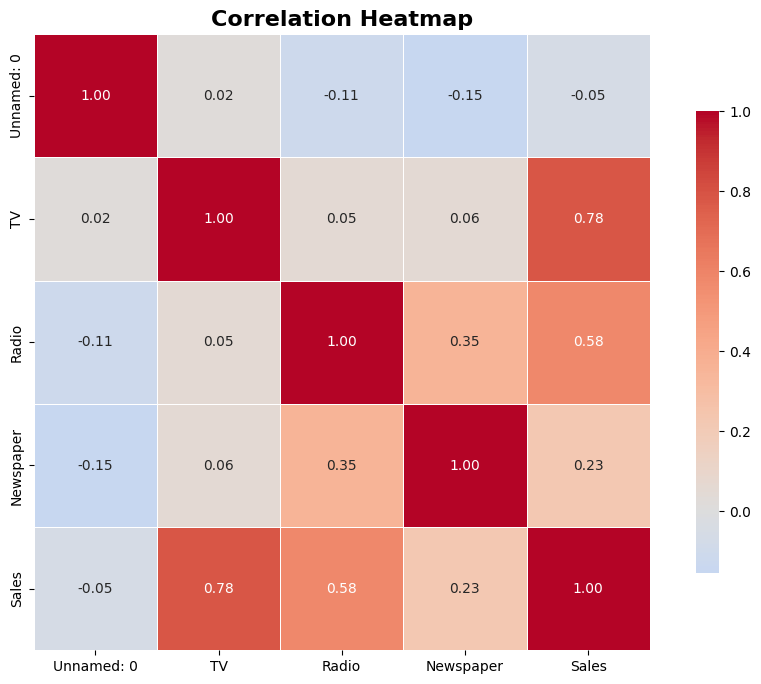

In [17]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create an enhanced heatmap
sns.heatmap(
    data.corr(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f",  # Format numbers to 2 decimal places
    linewidths=0.5,  # Add light grid lines for readability
    linecolor='white',
    square=True,  # Make heatmap squares
    cbar_kws={'shrink': 0.75},  # Adjust color bar size
    center=0  # Ensure 0 is neutral in the color scale
)

# Title with larger font
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')

# Show plot
plt.show()


In [8]:
# Feature Selection and Target Variable
X = data.drop(columns=['Sales'])
y = data['Sales']

In [9]:
# Encoding categorical variables (if any)
X = pd.get_dummies(X, drop_first=True)

In [10]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Linear Regression Model
lr_model = LinearRegression()

In [12]:
# Random Forest Regressor Model
rf_model = RandomForestRegressor(random_state=42)

In [13]:
# Combined Model using Voting Regressor
combined_model = VotingRegressor(estimators=[('Linear Regression', lr_model), ('Random Forest', rf_model)])
combined_model.fit(X_train, y_train)

VotingRegressor(estimators=[('Linear Regression', LinearRegression()),
                            ('Random Forest',
                             RandomForestRegressor(random_state=42))])

In [14]:
VotingRegressor(estimators=[('Linear Regression', LinearRegression()),
                            ('Random Forest',
                             RandomForestRegressor(random_state=42))])

VotingRegressor(estimators=[('Linear Regression', LinearRegression()),
                            ('Random Forest',
                             RandomForestRegressor(random_state=42))])

In [15]:
# Predictions and Evaluation
y_pred_combined = combined_model.predict(X_test)

print("Combined Model Performance:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_combined):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_combined):.2f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred_combined)):.2f}")

Combined Model Performance:
Mean Absolute Error: 0.83
Mean Squared Error: 1.02
Root Mean Squared Error: 1.01


<ipython-input-20-c9793761d5b6>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


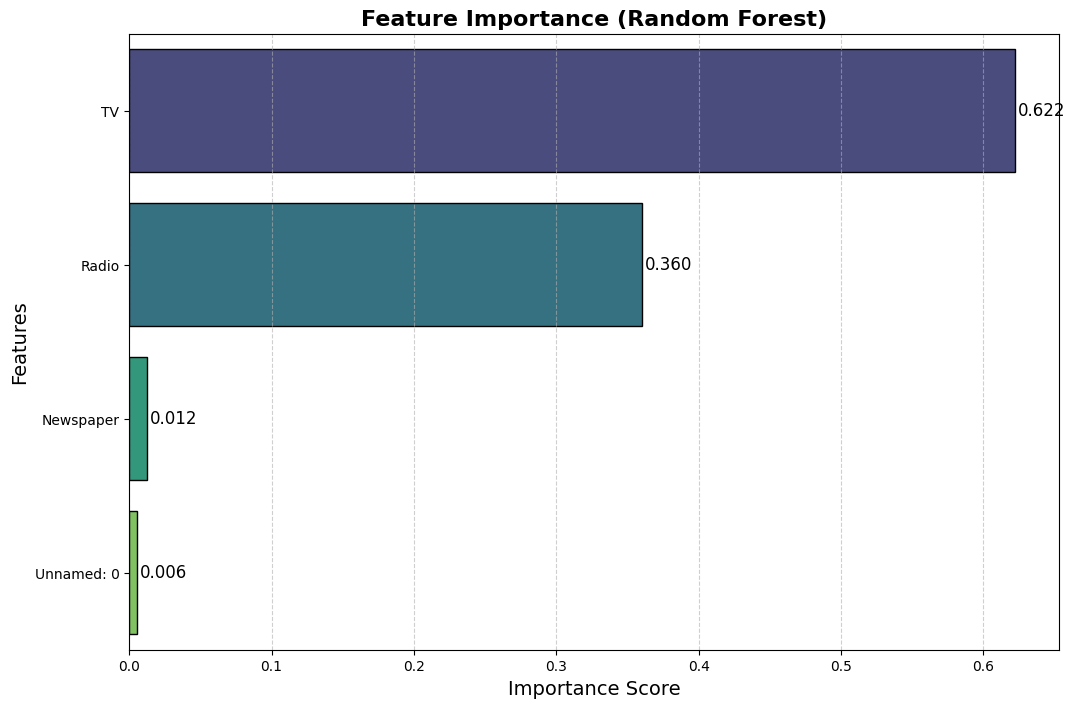

In [20]:
# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Get feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Set the figure size
plt.figure(figsize=(12, 8))

# Create bar plot with gradient coloring
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importance,
    palette='viridis',  # Gradient color
    edgecolor='black'  # Define edge color
)

# Add value labels to bars
for index, value in enumerate(feature_importance['Importance']):
    plt.text(value + 0.002, index, f'{value:.3f}', fontsize=12, va='center')

# Titles and labels
plt.title('Feature Importance (Random Forest)', fontsize=16, fontweight='bold')
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Features', fontsize=14)

# Remove unnecessary grid lines
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Show plot
plt.show()